---
title: "CFRM 505 Homework 2"
author: "Eunki Chung"
date: today
output: pdf_document
---

# Problem 1

Consider the random variables $X$ and $Y$ with the following joint distribution:

$$f_{XY}(x, y) = \left\{ \begin{array}{cc} \frac{xy^2 + 2xy}{Z} & 0 < x, y < 1 \\ 0 & \textrm{ otherwise} \end{array} \right.$$

where $Z$ is some constant.  Calculate the following quantities analytically (**not** by simulation).

1) $\mathbb{P}\left[X + Y < 0.5\right]$

2) $\mathbb{E}[X]$

3) $\textrm{Var}[Y]$

4) $\textrm{Cov}[X, Y]$

5) $\textrm{Corr}[X, Y]$

6) $\mathbb{P}(X > 0.5 \:\vert\: Y > 0.5)$

7) $\mathbb{E}[X \:\vert\: Y = 0.25]$

$$f_{XY}(x, y) = \left\{ \begin{array}{cc} \frac{xy^2 + 2xy}{Z} & 0 < x, y < 1
\\ 0 & \textrm{ otherwise} \end{array} \right.$$

$$
a + b
$$



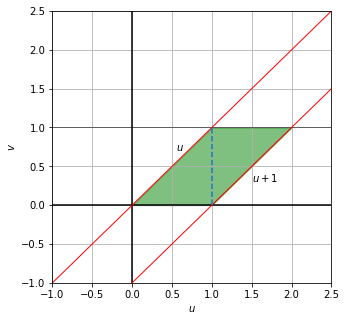

In [1]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(figsize=(5, 5))
plt.xlim(-1, 2.5)
plt.ylim(-1, 2.5)
x = np.linspace(-1,3)
ax.axhline(y=0, color='k')
ax.axhline(y=1, color='k', alpha=0.5, lw=1)
ax.axvline(x=0, color='k')
y = np.linspace(0, 1)
high, low = y, y+1
ax.plot(x, x, c='r', lw=1)
ax.plot(x, x-1, c='r', lw=1)
plt.fill_betweenx(y, low, high, color='green',
                 alpha=0.5)
plt.vlines(x=1, ls='--', ymin=0.0, ymax= 1., )
plt.text(0.55, 0.7, r"$u$")                
plt.text(1.5, 0.3, r"$u+1$")
plt.xlabel(r'$u$')                
plt.ylabel(r'$v$')                
ax.grid()
plt.savefig("assets/support.png", bbox_inches="tight")


In [2]:
class LinearCongruentialGenerator():
    def __init__(self, seed, multiplier, modulus) -> None:
        self.state = seed
        self.multiplier = multiplier
        self.modulus = modulus
    def step(self):
        self.state = self.multiplier * self.state % self.modulus
    def sample(self):
        return self.state / self.modulus
rng = LinearCongruentialGenerator(1, 6, 11)
for _ in range(20):
    print(rng.state, rng.sample())
    rng.step()

1 0.09090909090909091
6 0.5454545454545454
3 0.2727272727272727
7 0.6363636363636364
9 0.8181818181818182
10 0.9090909090909091
5 0.45454545454545453
8 0.7272727272727273
4 0.36363636363636365
2 0.18181818181818182
1 0.09090909090909091
6 0.5454545454545454
3 0.2727272727272727
7 0.6363636363636364
9 0.8181818181818182
10 0.9090909090909091
5 0.45454545454545453
8 0.7272727272727273
4 0.36363636363636365
2 0.18181818181818182


In [3]:
rng = LinearCongruentialGenerator(1, 3, 11)

for _ in range(10):
    print(rng.state, rng.sample())
    rng.step()

1 0.09090909090909091
3 0.2727272727272727
9 0.8181818181818182
5 0.45454545454545453
4 0.36363636363636365
1 0.09090909090909091
3 0.2727272727272727
9 0.8181818181818182
5 0.45454545454545453
4 0.36363636363636365


In [4]:
rng = LinearCongruentialGenerator(1, 9, 11)

for i in range(20):
    print(i, rng.state, rng.sample())
    rng.step()

0 1 0.09090909090909091
1 9 0.8181818181818182
2 4 0.36363636363636365
3 3 0.2727272727272727
4 5 0.45454545454545453
5 1 0.09090909090909091
6 9 0.8181818181818182
7 4 0.36363636363636365
8 3 0.2727272727272727
9 5 0.45454545454545453
10 1 0.09090909090909091
11 9 0.8181818181818182
12 4 0.36363636363636365
13 3 0.2727272727272727
14 5 0.45454545454545453
15 1 0.09090909090909091
16 9 0.8181818181818182
17 4 0.36363636363636365
18 3 0.2727272727272727
19 5 0.45454545454545453


\pagebreak

# Problem 2

Use Monte Carlo integration to estimate

$$\int_{-2}^{3}3x^2 + 2x\,\textrm{d}x$$

(The exact answer is 40.  You don't need to rederive it.)

Use a sample size of at least $n = 100,000$.

Let $u = \frac{1}{5}x + \frac{2}{5} \Leftrightarrow x = 5u - 2,\quad
\frac{dx}{du} = 5$ 
\begin{align*}
    \int_{-2}^{3}3x^2 + 2x\,dx &= \int_{0}^{1} (3(5u - 2)^2 + 2(5u - 2)) \frac{dx}{du} \,du  \\ 
    &= \int^{1}_{0} ( 3(25u^{2} - 20u + 4) + 10u - 4) \cdot 5\,du \\ 
    &= \int_{0}^{1}\left( 75u^{2} - 60u + 12 + 10u - 4 \right) \cdot 5\,du \\ 
    &= \int^{1}_{0} 375u^{2} - 250u + 40 \,du \\ 
    &= E[f(U)]
\end{align*}
$\quad \text{where } U \sim \text{Unif}(0,1)\text{ and }f(u) = 375u^{2} - 250u +
40$

By default, `np.random.random()` method uses Mersenne Twister algorithm (`MT19937`) for its Pesudo Random Number Generator(PRNG).
However, the official numpy documentation recommends to use other modern PRNG
instead of `MT19937`, since `MT19937` fails some statiscal tests and does not have
any significant advantage in its generation speed. 

Therefore, for the generation of Uniform random samples, I used
Permutation Congruential Generator (`PCG64`) as recommended.

In addition, I used parallel processing to generate very large numbers of
sample. As shown in below, multi-threaded generatior made a significant improvement 
in speed compared to a single-threaded generator.

Ref: https://numpy.org/doc/stable/reference/random/performance.html

In [5]:
import numpy as np
rng = np.random.default_rng(12)
# Use Permutation Congruential Generator(PCG64) instead of Mersenne Twister(MT19937)

In [6]:
from numpy.random import default_rng, SeedSequence
import multiprocessing
import concurrent.futures
import numpy as np

class MultithreadedRNG:
    def __init__(self, n, seed=None, threads=None):
        if threads is None:
            threads = multiprocessing.cpu_count()
        self.threads = threads

        seq = SeedSequence(seed)
        self._random_generators = [default_rng(s)
                                   for s in seq.spawn(threads)]

        self.n = n
        self.executor = concurrent.futures.ThreadPoolExecutor(threads)
        self.values = np.empty(n)
        self.step = np.ceil(n / threads).astype(np.int_)

    def fill(self):
        def _fill(random_state, out, first, last):
            random_state.random(out=out[first:last])

        futures = {}
        for i in range(self.threads):
            args = (_fill,
                    self._random_generators[i],
                    self.values,
                    i * self.step,
                    (i + 1) * self.step)
            futures[self.executor.submit(*args)] = i
        concurrent.futures.wait(futures)

    def __del__(self):
        self.executor.shutdown(False)

In [7]:
mrng = MultithreadedRNG(100_000_000, seed=12)

In [8]:
from timeit import timeit
print("Single Thread")
value = np.empty(100_000_000)
%timeit rng.random(out=value)
print(f"Multi Thread (num_threads={mrng.threads})")
%timeit mrng.fill()

Single Thread
437 ms ± 19.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Multi Thread (num_threads=8)
75.1 ms ± 1.5 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [9]:
from tqdm import tqdm
val = 0.
ests = []
for i in tqdm(range(1000)):
    mrng.fill()
    smpls = mrng.values
    val += np.sum(375 * (smpls ** 2) - 250 * smpls + 40)
    ests.append(val / ((i+1) * int(1e8)))

100%|██████████| 1000/1000 [06:32<00:00,  2.55it/s]


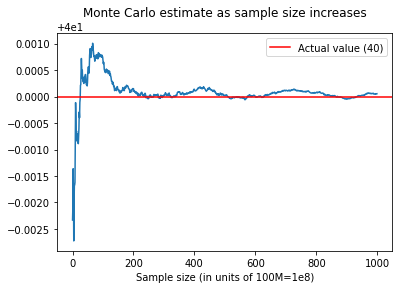

In [10]:
import matplotlib.pyplot as plt
plt.plot(ests)
plt.axhline(40, color='red', label="Actual value (40)")
plt.xlabel("Sample size (in units of 100M=1e8)")
plt.legend()
plt.title("Monte Carlo estimate as sample size increases")
plt.show()

In [11]:
print(f"{'Monte Carlo estimate ': <21} = {ests[-1]}")
print(f"{'Theoretical value ': <21} = {40}")

Monte Carlo estimate  = 40.0000533971071
Theoretical value     = 40


# Problem 3

Use Monte Carlo integration to estimate

$$\int_{0}^{\infty}\int_{0}^{1}\frac{xy}{1 + x^4}\,\textrm{d}y\textrm{d}x$$

(The exact answer is $\pi/8$.  You don't need to rederive it.)

Use a sample size of at least $n = 100,000$.

Let $z = \frac{x}{1+x} = \frac{1}{\frac{1}{x} + 1} \Leftrightarrow x = \dfrac{z}{1-z},
\quad \dfrac{dx}{dz} = \dfrac{1}{\left( 1-z\right) ^{2}} $

Notice that $0 < x < \infty \Leftrightarrow 0 < z < 1$ since 
    $$\lim_{x \rightarrow 0+} \frac{1}{\frac{1}{x} + 1} = 0, \quad 
    \lim_{x \rightarrow \infty} \frac{1}{\frac{1}{x} + 1} = 1$$
\begin{align*}
    \int_{0}^{\infty}\int_{0}^{1}\frac{xy}{1 + x^4}\,\textrm{d}y\textrm{d}x &= 
    \int_{0}^{1} \int_{0}^{1} \dfrac{\dfrac{z}{1-z}y}{1+\left( \dfrac{z}{1-z}\right) ^{4}}\cdot \dfrac{1}{\left( 1-z\right) ^{2}}\,dx\,dz \\
    &= \int_{0}^{1} \int_{0}^{1} \dfrac{\dfrac{z}{(1-z)^3}}{1+\dfrac{z^{4}}{\left( 1-z\right) ^{4}}}y \,dz\,dy \\
    &= \int_{0}^{1} \int^{1}_{0} \dfrac{\left( 1-z\right) \cdot z}{\left( 1-z\right) ^{4}+z^{4}}y \,dz\,dy \\ 
    &= E[f(Z) \cdot Y]  
\end{align*}
    where $Y,\ Z \overset{\mathrm{\text{iid}}}{\sim} \text{Unif}(0, 1)$ and $f(z) = \dfrac{\left(1-z\right) \cdot z}{\left( 1-z\right)^{4}+z^{4}}$

In [12]:
u1 = mrng.values.copy()
mrng.fill()
u2 = mrng.values.copy()
est = np.mean((((1-u1) * u1) / ((1-u1) ** 4 + u1 ** 4)) * u2)
print(f"{'Monte Carlo estimate ' : <21} = {est}")
print(f"{'Theoretical value ' : <21} = {np.pi / 8}")

Monte Carlo estimate  = 0.39275503717035704
Theoretical value     = 0.39269908169872414


# Problem 4

Let $U \sim U(0, 1)$ and $X = 1 - U$.  Use Monte Carlo simulation to confirm that

$$\mathbb{E}[X] = \frac{1}{2} \:\textrm{ and }\: \textrm{Var}[X] = \frac{1}{12} \:\textrm{ and }\: \textrm{Cov}[U, X] = -\frac{1}{12}$$

Use a sample size of at least $n = 100,000$.

In [13]:
u = mrng.values
x = 1 - u

In [14]:
print("Monte Carlo estimates")
print("---" * 15)
print(f"{'E[X] ' : <10} = {np.mean(x)}")
print(f"{'Var[X] ': <10} = {np.cov(u,x)[0,0]}")
print(f"{'Cov[U, X] ': <10} = {np.cov(u,x)[0,1]}")
print("---" * 15, "\n")
print("Theoretical values")
print("---" * 15)
print(f"{'E[X] ' : <10} = {1/2}")
print(f"{'Var[X] ': <10} = {1/12}")
print(f"{'Cov[U, X] ': <10} = {-1/12}")

Monte Carlo estimates
---------------------------------------------
E[X]       = 0.4999481238364926
Var[X]     = 0.08332875314388954
Cov[U, X]  = -0.08332875314388954
--------------------------------------------- 

Theoretical values
---------------------------------------------
E[X]       = 0.5
Var[X]     = 0.08333333333333333
Cov[U, X]  = -0.08333333333333333


# Problem 5

Let $U_1$ and $U_2$ be i.i.d. uniform random variables on $(0, 1)$.  Define $X = \textrm{max}(U_1, U_2)$.  Derive the following by hand and then use Monte carlo simulation to estimate them:

1) $\mathbb{E}[X]$

2) $\mathbb{P}[X < 0.25]$

Use a sample size of at least $n = 100,000$ for each part.

$$X = \max(U_{1},U_{2}), \quad \text{where } U_{1},U_{2} \overset{\text{iid}}{\sim} \text{Unif}\left( 0,1\right)$$
<!-- \begin{align*}
    P(X \leq x) &= P(\max \left( U_{1},U_{2}\right) \leq x)  \\ 
    &= P(U_{1} \leq x) \cdot P\left( U_{2}\leq x\right)  \\ 
    &= \int _{0}^{x}1\,du_1 \cdot \int _{0}^{x}1\,du_{2} \\ 
    &= x^2 
\end{align*}
By definition of cdf, \\
$$F_X(x) = P(X \leq x) = \begin{cases}
    1 & 1 \leq x \\
    x^2 & 0 < x < 1 \\ 
    0 & x \leq 0
\end{cases}$$ \\ 
and the pdf is \\
$$f_X(x) =
F'_X(x) = \begin{cases}
    2x & 0 < x < 1 \\
    0 & o.w.
\end{cases}$$.
\\
\subsection*{1)}
\begin{align*}
    E[X] &= \int_{0}^{1}x f_X(x) \,dx \\
    &= \int_{0}^{1} 2x^2 \,dx \\
    &= \left. \frac{2}{3}x^3 \right|^1_0  \\ 
    &= \frac{2}{3} \\
\end{align*}
\subsection*{2)}
$$P(X \leq 0.25) = F_X\left(\frac{1}{4}\right) = \frac{1}{16}$$ -->


\begin{align*}
    P(X \leq x) &= P(\max \left( U_{1},U_{2}\right) \leq x)  \\ 
    &= P(U_{1} \leq x) \cdot P\left( U_{2}\leq x\right)  \\ 
    &= \int _{0}^{x}1\,du_1 \cdot \int _{0}^{x}1\,du_{2} \\ 
    &= x^2 
\end{align*}
By definition of cdf,
$$F_X(x) = P(X \leq x) = 
\begin{cases}
    1 & 1 \leq x \\
    x^2 & 0 < x < 1 \\ 
    0 & x \leq 0 \\
\end{cases}$$  
and the pdf is
$$f_X(x) = F'_X(x) = 
\begin{cases}
    2x & 0 < x < 1 \\
    0 & o.w. \\
\end{cases}$$

### 1)  

\begin{align*}
    E[X] &= \int_{0}^{1}x f_X(x) \,dx \\
    &= \int_{0}^{1} 2x^2 \,dx \\
    &= \left. \frac{2}{3}x^3 \right|^1_0  \\ 
    &= \frac{2}{3} \\
\end{align*}

### 2) 

$$P(X \leq 0.25) = F_X\left(\frac{1}{4}\right) = \frac{1}{16}$$

In [15]:
x = np.max([u1, u2], axis=0)

In [16]:
print(f"{'Monte Carlo estimate ': <21}" + f"= {np.mean(x)}")
print(f"{'Theoretical value ': <21}" + f"= {2/3}")

Monte Carlo estimate = 0.66668394507005
Theoretical value    = 0.6666666666666666


In [17]:
print(f"{'Monte Carlo estimate ': <21}" + f"= {np.mean(x < 0.25)}")
print(f"{'Theoretical value ': <21}" + f"= {1/16}")

Monte Carlo estimate = 0.06248674
Theoretical value    = 0.0625
